In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from census import Census
import gmaps

In [25]:
# Census & gmaps API Keys
from config import (api_key, gkey)
c = Census(api_key, year=2013)

# Configure gmaps
gmaps.configure(api_key=gkey)

In [26]:
# Run Census Search to retrieve data on all states
# GROUP = "B25071"
#MEDIAN GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS (DOLLARS)


median_rent_data = c.acs5.get(("NAME", "B25071_001E"), 
                         {'for': 'state: 06, 08, 12, 16, 41, 48'})

# Convert to DataFrame
median_rent_pd = pd.DataFrame(median_rent_data)

# Column Reordering
median_rent_pd = median_rent_pd.rename(columns={"B25071_001E": "Median Rent as a percentage of household income 2013",
                                                                                           
                                      "NAME": "Name", "state": "State"})

#Sorting
sorted_df = median_rent_pd.sort_values("Median Rent as a percentage of household income 2013", ascending=False)
sorted_df

,Name,Median Rent as a percentage of household income 2013,State
2,Florida,34.9,12
0,California,33.7,06
4,Oregon,32.2,41
1,Colorado,30.9,08
3,Idaho,29.8,16
5,Texas,29.6,48


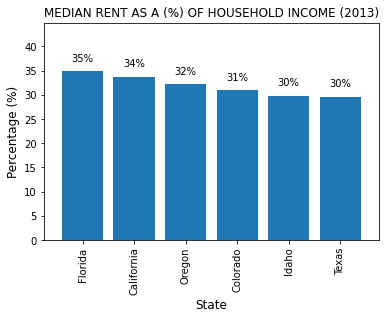

In [27]:
# Plots

x_axis = sorted_df["Name"]
y_axis = sorted_df["Median Rent as a percentage of household income 2013"]

plt.title("MEDIAN RENT AS A (%) OF HOUSEHOLD INCOME (2013)")
plt.xlim(-0.75, len(x_axis)-.25)
plt.ylim(0, max(y_axis) + 10)
plt.xlabel("State", fontsize = 12)
plt.ylabel("Percentage (%)",fontsize = 12)



plt.bar(x_axis,y_axis)

for x,y in zip(x_axis,y_axis):

    label = "{:.0f}%".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    
plt.xticks(x_axis, rotation="vertical")
plt.show()